# **Symbols - the fundamental class in SymPy**

In [1]:
# Uncontrolled imports are bad behaviour, but OK for interactive work
from sympy import *
# Turn on SymPy stylised printing 
init_printing()
# Prepare figure plotting
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 5, 5

In [2]:
# First we need to tell SymPy to treat certain symbols as 'special'
# In particular, we need to tell it that certain letters are mathematical symbols
# The symbol is the fundamental class in SymPy, like the array in NumPy, or the dataframe in Pandas.
# What happens if we don't do this
2*x + 1

NameError: name 'x' is not defined

In [3]:
# Hah, so vanilla Python treats x as an undefined variable, as you would expect
# To do symbolic computation, we need to declare x as a SymPy symbol instead
x = symbols('x')
# Let's do y as well
y = symbols('y')
# Or we could do both at the same time
x, y = symbols('x, y')
# Or like this
x, y = symbols('x y')

In [4]:
y = 2 * x + 1
y

In [5]:
# Free to choose different names for variables, but this is weird and prone to error. Don't do this
a, b = symbols('x,y')
b = 2 * a + 1
b

In [6]:
# Restore sanity
x, y = symbols('x,y')
y = 2 * x + 1

In [7]:
# Now we can do neat things, like solve equations analytically
# Let's solve y = 2x + 1
# Note that solve assumes you're solving for y = 0
solve(y)

In [8]:
# Solve y = 2x + 5
solve(y+4)

In [9]:
# Let's try a quadratic
solve(x**2 - 4, x)

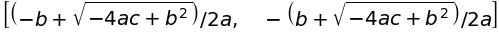

In [10]:
# Can also solve equations with free parameters!
# Here we use SymPy to rederive the quadratic equation solver you might remember from school
a,b,c,x,y = symbols('a b c x y')
y = a*x**2 + b*x + c
solve(y, x)

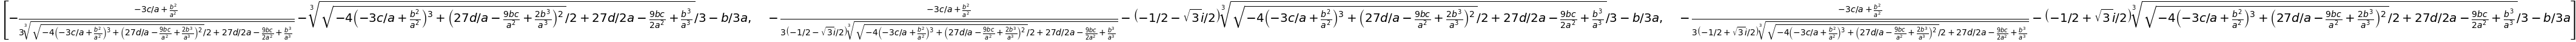

In [11]:
# Let's push our luck, what about analytic solutions for a cubic?
# Don't worry about the output here, just to demonstrate the capabilities of the package
# For a cubic, we expect three roots, and that's what we get.
d = symbols('d')
y = a*x**3 + b*x**2 + c*x + d
solve(y,x)

# **Manipulating Expressions**

In [12]:
# Let's start with a polynomial
f = 3*x**2 + 4*x
f

In [13]:
# If we have multiple terms involving x to the same power, we should 'collect' these
f = x**2 + 4*x + 2*x**2
f.collect(x)

In [14]:
# But I think this is done by default anyway
f

In [15]:
# Now let's simplify this expression. In this case, simplify will take out a common factor of x
f.simplify()
simplify(f)

In [16]:
# Can do the same thing with factor()
f.factor()

In [17]:
# Or get more structured output with factors_list()
factor_list(f)

In [18]:
## Board, explanation of why taking out common factors is useful - root finding, simplifying quotients

In [19]:
# Now let's go the other way, and expand a factorised expression
g = (3*x+4)*(12*x**2)
# This way
expand(g)
# Or this way
g.expand()

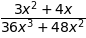

In [20]:
# Now let's write a complicated quotient of the two polynomials and imagine we were presented with this
# and asked to simplify it
h = f / g.expand()
h

In [21]:
# We've 'built' this expression up ourselves, so we know that top and bottom (numerator and denominator)
# share common factors that we can cancel out to simplify.
# Let's see what SymPy makes of it
h.simplify()

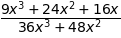

In [22]:
# What would you expect the simplified form of this to be?
k = (f*(3*x+4)).expand() / g.expand()
k

In [23]:
k.simplify()

In [24]:
# There is also a function to cancel common factors in a quotients and reduce to simplified form
k.cancel()

# **Evaluating expressions**

In [25]:
# Manipulating expressions is fine, but eventually we'll wish to plug in 
# values for our variables and evaluate the expression
# Let's see how to do that using the .subs() method
x, y = symbols('x, y')
expr = sin(x) + cos(y)

In [26]:
expr.subs({x: 1, y: pi})

In [27]:
# Hmm, this is the exact analytic result, but if we want a real output, need one further step
expr.subs({x: 1, y: pi}).n()

In [28]:
# .n() asks for a numeric value
# Equivalent
N(expr.subs({x: 1, y: pi}))

# **Setting symbol types**

In [29]:
# If we tell SymPy nothing about the type of a symbol, it limits the options to simplify
# Here we give no information
y = sqrt(x**2)
simplify(y)

In [30]:
# Next we rule out 'complex' numbers by setting real = True, now we get a useful simplification
x = symbols('x', real=True)
y = sqrt(x**2)
simplify(y)

In [31]:
# If we limit x to be a positive real number, we get the most simplification
x = symbols('x', real = True, positive=True)
y = sqrt(x**2)
simplify(y)

# **Intersection of two lines**

In [32]:
x = symbols('x')

In [33]:
# Line 1
y1 = 2*x + 4
y1

In [34]:
# Line 2
y2 = x + 3
y2

In [35]:
# Equation - set the y values of the two lines equal to each other
# Equation defined by Eq class
e = Eq(y1, y2)
e

In [37]:
# Now solve this equation for x
soln_x = solve(e, x)
soln_x[0]

In [38]:
# We can get the corresponding y-value by substituting the solving x back into one of the line expressions 
y1.subs({x: soln_x[0]})

In [39]:
# It doesn't matter which of the line expressions we use
# This is basically what it means for the two lines to intersect - x and y coords are the same at
# one point on both lines
y2.subs({x: soln_x[0]})

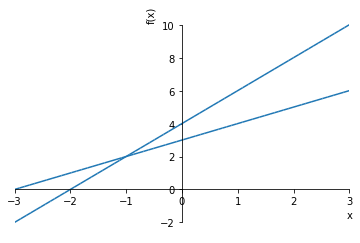

In [40]:
# So our two lines meet at (-1,2)
plot(y1, y2, (x,-3,3))

In [41]:
## Do corresponding algebra on board

In [42]:
# General solution
# Let's re-initialise all our symbols
c1, c2, m1, m2, x = symbols('c1 c2 m1 m2 x')
# Now write expressions of the two lines in general form
y1 = c1 + m1 * x
y2 = c2 + m2 * x

In [43]:
# Setup eqn and solve
e = Eq(y1, y2)
x_soln = solve(e, x)[0]
y_soln = y1.subs({x: x_soln})

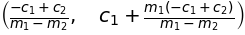

In [44]:
# Coordinates of the intersection
(x_soln, y_soln)

In [45]:
# From this you see that if the two lines are parallel (m1 = m2), then they never meet 
# m1 - m2 in denominator of expression for x-coordinate

# **Intersection of a line and a parabola**

In [46]:
y1 = x**2 - 2
y2 = 2*x + 1
e = Eq(y1,y2)
x_soln = solve(e,x)
y_soln = [y2.subs({x: x_val}) for x_val in x_soln]
x_soln, y_soln

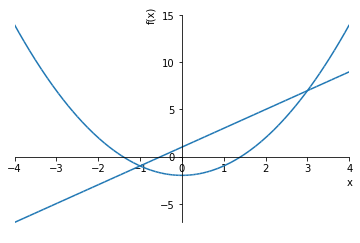

In [47]:
plot(y1, y2, (x,-4,4))

In [48]:
# What if they don't intersect?
y2 = 2*x - 5
e = Eq(y1,y2)
x_soln = solve(e,x)
y_soln = [y2.subs({x: x_val}) for x_val in x_soln]
x_soln, y_soln
# Hmm, complex solutions

In [57]:
# OK wiseguy, give me only real values, not complex
x = symbols('x', real = True)
y1 = x**2 - 2
y2 = 2*x - 8
e = Eq(y1,y2)
x_soln = solve(e,x)
y_soln = [y2.subs({x: x_val}) for x_val in x_soln]
x_soln, y_soln
# No real solutions

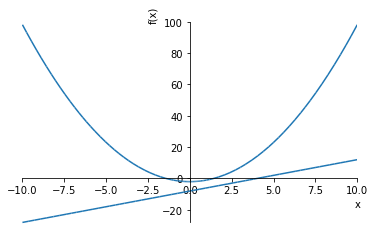

In [58]:
plot(y1,y2)

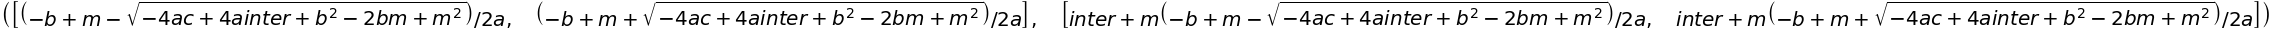

In [60]:
# General solution
a, b, c, m, inter, x = symbols('a, b, c, m, inter, x')
y1 = a*x**2 + b*x + c
y2 = m*x + inter
e = Eq(y1,y2)
x_soln = solve(e,x)
y_soln = [y2.subs({x: x_val}) for x_val in x_soln]
(x_soln, y_soln)

# **Finding equations of curves**

In [61]:
#Find the equation of the quadratic with roots at x = 2 and x = 4, passing through the point (0, 6)
k, x = symbols('k, x')
f1 = (x-2)
f2 = (x-4)
# General form of quadratic k*(x-a)*(x-b) where k is a constant, a and b are roots
expr = k*f1*f2
e = Eq(expr.subs({x: 0}),6)
k = solve(e,k)[0]
expr = k*f1*f2
expr.expand()

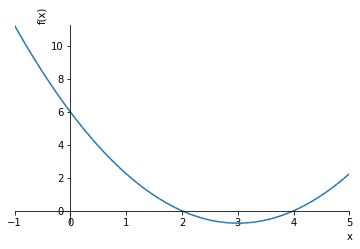

In [62]:
plot(expr, (x, -1, 5))

In [63]:
# This is a method called 'completing the square'
# Write x**2 - 4*x + 7 in the form (x-h)**2 + k
# There is no 'complete_the_square()' method in SymPy, but we can express this as an equation to solve
h, k, x = symbols('h, k, x')
lhs = x**2 - 4*x + 7
rhs = (x-h)**2 + k
e = Eq(lhs, rhs)
solve(e, [h,k])

In [64]:
# verify
rhs.subs({h: 2, k: 3}).expand()

# **Compound functions**

In [ ]:
9# Let's investigate f(g(x)) and g(f(x)) for two functions f and g
f = 9*x**2 - 2*x + 1
g = exp(x)**2
f_of_g = f.subs({x: g})
f_of_g.simplify()

In [ ]:
g_of_f = g.subs({x: f})
g_of_f.simplify()

In [ ]:
# So, we clearly see in general that f(g(x)) and g(f(x)) are not equal

# **Inverse functions**

In [ ]:
x, y = symbols('x, y')
f = 1/(x-4)
e = Eq(y, f)
f_inv = solve(e,x)[0]
f_inv.subs({y: f})

In [ ]:
x, y, z = S('x, y, z')
z = x + 1
y = 2 * x**2
e = Eq(y,z)

In [ ]:
e

In [ ]:
solveset(e,x)

In [ ]:
x, y, z = S('x, y, z')
c = x**2 + y**2 - 4
l = x + y
solve((c,l), dict=True)

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 5, 5
from sympy.plotting import plot_implicit
c_plot = plot_implicit(c, show=False)
l_plot = plot_implicit(l, show=False)
c_plot.extend(l_plot)
c_plot.show()